Case Study I

# Cyclistic Case Study: Data Cleaning and Analysis

This notebook explores the usage patterns of Cyclistic bike-share services in Chicago.
The goal is to understand how different user types interact with the service and identify insights to support strategic decisions.


# 🛠️ Transformation Log

## 📦 Environment and Libraries

- Python version: `3.x`
- Main libraries used:
  - `pandas` for data manipulation
  - `matplotlib` and `seaborn` for data visualization
  - `numpy` for numerical operations
  - `datetime` for date-time handling

---

## 🔄 Data Transformation Steps

### 🕒 Conversion of Date and Time Columns

- The `started_at` column was converted to **datetime** format.  
- The `ended_at` column was converted to **datetime** format.  
- From these columns, the following were extracted:
  - `date`: the date part
  - `hour`: the hour of the ride
  - `day_of_week`: day name (e.g., Monday, Tuesday)

---

### ⏱️ Trip Duration Calculation

- Trip duration was calculated as the difference between `ended_at` and `started_at`.
- A new column `trip_duration_min` was created with the value in **minutes**.

---

### 🔄 Correction of Negative Durations

- Negative values in `trip_duration_min` (possibly due to recording errors) were identified.
- Applied the `abs()` function to convert them to **positive values**.

---

### 🚫 Outlier Detection and Removal

- Outliers in trip duration were detected using the **Interquartile Range (IQR)** method.
- Definition:
  - `Q1 = 25th percentile`
  - `Q3 = 75th percentile`
  - `IQR = Q3 - Q1`
  - Thresholds: `Q1 - 1.5*IQR` and `Q3 + 1.5*IQR`
- Trips with durations outside this range were **excluded** from the dataset.

---

### 📆 Trimester Categorization

- The `season` or time-related grouping column was updated to represent **trimesters**:
  - `Q1`: January to March
  - `Q2`: April to June
  - `Q3`: July to September
  - `Q4`: October to December
- Implemented via a custom function `get_quadrimester()` applied to the `month` extracted from `started_at`.

---

### 🧹 Handling Missing Values

- Removed rows containing **NaN** values using `dropna()`.
- Focused especially on critical columns like `trip_duration_min`, `started_at`, and `member_casual`.

---

### ✂️ Column Name Cleaning

- Applied `str.strip()` to **remove leading/trailing whitespaces** in column names.

---

### ✅ Final Data Integrity Check

- Final verification steps were performed to ensure:
  - Proper formatting of all columns
  - No remaining nulls
  - Logical consistency in date and duration data

---


In [1]:
# Ler Todas as Planilhas do Arquivo Excel
import pandas as pd

# Carregar todas as planilhas
arquivo_excel = "D:\Downloads\Case Study 1\Python\Annual_Bikes.xlsx"
planilhas = pd.read_excel(arquivo_excel, sheet_name=None)  # Lê todas as planilhas

# Ver os nomes das planilhas
print(planilhas.keys())  


dict_keys(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Out', 'Nov', 'Dec'])


In [2]:
# Concatenar todas as planilhas em um único DataFrame
df_geral = pd.concat(planilhas.values(), ignore_index=True)

# Exibir informações gerais
print(df_geral.info())
print(df_geral.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525842 entries, 0 to 4525841
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
 9   week_day            float64       
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 345.3+ MB
None
                          started_at                       ended_at  week_day
count                        4525842                        4525842       0.0
mean   2021-07-14 02:56:52.545110016  2021-07-14 03:16:50.100310784       NaN
min              2020-12-01 00:07:08            2020-11-25 07:40:56       NaN
25%    2021-05-28

In [3]:
# Lista dos meses
meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Out", "Nov", "Dec"]

# Iterar sobre cada planilha e exibir as primeiras linhas
for mes in meses:
    print(f"\n🔹 Planilha: {mes}")
    print(planilhas[mes].head())




🔹 Planilha: Jan
            ride_id  rideable_type          started_at            ended_at  \
0  0D139A3203274B87   classic_bike 2021-01-01 00:02:24 2021-01-01 00:08:39   
1  C7AE8E9CDB197A8E   classic_bike 2021-01-01 00:06:55 2021-01-01 00:26:36   
2  3097EF26414C7016   classic_bike 2021-01-01 00:12:21 2021-01-01 00:12:33   
3  938D5D1998A5470E   classic_bike 2021-01-01 00:12:27 2021-01-01 00:12:30   
4  6604F61AE4B14BC1  electric_bike 2021-01-01 00:12:49 2021-01-01 00:43:59   

              start_station_name start_station_id  \
0             State St & 33rd St            13216   
1  Lakeview Ave & Fullerton Pkwy     TA1309000019   
2                Montrose Harbor     TA1308000012   
3                Montrose Harbor     TA1308000012   
4        Western Ave & Howard St              527   

               end_station_name end_station_id member_casual  
0           MLK Jr Dr & 29th St   TA1307000139        member  
1         Ritchie Ct & Banks St   KA1504000134        member  
2     

In [4]:
# Lista dos meses
meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Out", "Nov", "Dec"]

# Criar um dicionário para armazenar os DataFrames limpos
planilhas_limpas = {}

# Loop para verificar e tratar valores nulos
for mes in meses:
    print(f"\n🔹 Verificando planilha: {mes}")

    # Acessar o DataFrame
    df = planilhas[mes]

    # Verificar valores nulos
    print("Valores nulos por coluna:")
    print(df.isnull().sum())

    # Remover linhas com valores nulos
    df = df.dropna()
    # Remover espaços extras nos nomes das colunas
    df.columns = df.columns.str.strip()

    # Salvar o DataFrame limpo no dicionário
    planilhas_limpas[mes] = df

    print(f"✔ Planilha {mes} tratada e armazenada.\n")




🔹 Verificando planilha: Jan
Valores nulos por coluna:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
dtype: int64
✔ Planilha Jan tratada e armazenada.


🔹 Verificando planilha: Feb
Valores nulos por coluna:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
dtype: int64
✔ Planilha Feb tratada e armazenada.


🔹 Verificando planilha: Mar
Valores nulos por coluna:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
dtype: int64
✔ Planilha Mar tratada e armazenada.


🔹 Verificando planilha: Apr
Valor

In [5]:
# Lista dos meses
meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Out", "Nov", "Dec"]

# Criar um dicionário para armazenar os DataFrames tratados
planilhas_tratadas = {}

# Loop para processar todas as planilhas
for mes in meses:
    print(f"\n🔹 Processando planilha: {mes}")

    # Acessar o DataFrame
    df = planilhas[mes]

    # Converter colunas para datetime
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["ended_at"] = pd.to_datetime(df["ended_at"])
    df['weekday'] = df['started_at'].dt.day_name()  # Nome completo do dia da semana

    # Criar novas colunas para data e hora
    df["start_hour"] = df["started_at"].dt.hour  # Apenas a hora  
    df["end_hour"] = df["ended_at"].dt.hour

    # Extrair o nome e número do mês
    df["mes_nome"] = df["started_at"].dt.strftime("%B")  # Nome do mês (January, February...)
    df["mes_num"] = df["started_at"].dt.strftime("%m")   # Número do mês (01, 02, ..., 12)

    #Corrigir timestamps invertidos
    
    df.loc[df["ended_at"] < df["started_at"], ["started_at", "ended_at"]] = df.loc[
        df["ended_at"] < df["started_at"], ["ended_at", "started_at"]
    ].values

    # Calcular a duração da viagem (em minutos)
    df["trip_duration_min"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60
    df = df[df["trip_duration_min"] >= 0]

    # Verificar se ainda há valores negativos
    print(df[df['trip_duration_min'] < 0])
      

    # Armazenar o DataFrame processado
    planilhas_tratadas[mes] = df

    print(f"✔ Planilha {mes} processada com sucesso.\n")

# Criar um único DataFrame consolidado com todas as planilhas
df_final = pd.concat(planilhas_tratadas.values(), ignore_index=True)

# Agrupar por mês e resetar índice
df_mes = df_final.groupby('mes_num').size().reset_index(name='count')

print(df_mes.head())



🔹 Processando planilha: Jan
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, member_casual, weekday, start_hour, end_hour, mes_nome, mes_num, trip_duration_min]
Index: []
✔ Planilha Jan processada com sucesso.


🔹 Processando planilha: Feb
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, member_casual, weekday, start_hour, end_hour, mes_nome, mes_num, trip_duration_min]
Index: []
✔ Planilha Feb processada com sucesso.


🔹 Processando planilha: Mar
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, member_casual, weekday, start_hour, end_hour, mes_nome, mes_num, trip_duration_min]
Index: []
✔ Planilha Mar processada com sucesso.


🔹 Processando planilha: Apr
Empty DataFrame
Columns: [ride_id, rideable_type, 

In [6]:
# Criar colunas de mês corretamente no DataFrame consolidado
df_final["mes_nome"] = df_final["started_at"].dt.strftime("%B")  # Nome do mês
df_final["mes_num"] = df_final["started_at"].dt.strftime("%m")   # Número do mês

# Agrupar os dados corretamente, contando a quantidade de ocorrências por mês
df_mes = df_final.groupby('mes_nome').size().reset_index(name="count")

# Mostrar os primeiros resultados
print(df_mes)


     mes_nome   count
0       April  298207
1      August  674409
2    December  113596
3    February   42996
4     January   83509
5        July  692321
6        June  608778
7       March  205691
8         May  450994
9    November  256219
10    October  477972
11  September  621150


In [7]:
print(df_mes["mes_nome"].unique())


['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']


In [8]:
meses_ordenados = [
    "janeiro", "fevereiro", "março", "abril", "maio", "junho",
    "julho", "agosto", "setembro", "outubro", "novembro", "dezembro"
]
traducao_meses = {
    "Janeiro": "January", "Fevereiro": "February", "Março": "March", "Abril": "April",
    "Maio": "May", "Junho": "June", "Julho": "July", "Agosto": "August",
    "Setembro": "September", "Outubro": "October", "Novembro": "November", "Dezembro": "December"
}

df_mes["mes_nome_en"] = df_mes["mes_nome"].map(traducao_meses)

In [9]:
print(df_mes[["mes_nome", "mes_nome_en"]].drop_duplicates())
print(df_mes.head())  # Deve mostrar os dados
print(df_mes.shape)   # Verifica se há registros


     mes_nome mes_nome_en
0       April         NaN
1      August         NaN
2    December         NaN
3    February         NaN
4     January         NaN
5        July         NaN
6        June         NaN
7       March         NaN
8         May         NaN
9    November         NaN
10    October         NaN
11  September         NaN
   mes_nome   count mes_nome_en
0     April  298207         NaN
1    August  674409         NaN
2  December  113596         NaN
3  February   42996         NaN
4   January   83509         NaN
(12, 3)


In [10]:
print(df_mes["mes_nome_en"].unique())  # Deve conter os meses em inglês


[nan]


In [11]:
df_mes["mes_nome_en"] = df_mes["mes_nome"].replace(traducao_meses)


In [13]:
# Função para definir o trimestre
def get_trimester(mes):
    if mes in [1, 2, 3]:
        return 'Q1'
    elif mes in [4, 5, 6]:
        return 'Q2'
    elif mes in [7, 8, 9]:
        return 'Q3'
    else:  # 10, 11, 12
        return 'Q4'

# Aplicar ao DataFrame
df_final["trimester"] = df_final["started_at"].dt.month.apply(get_trimester)
# Lista dos meses
meses = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Out", "Nov", "Dec"]

# Iterar sobre cada planilha, adicionar o trimestre e exibir as primeiras linhas
for mes in meses:
    df = planilhas[mes]  # Acessa o DataFrame de cada mês
    
    # Adicionar coluna "trimestre" com base no mês da coluna "started_at"
    df["trimester"] = df["started_at"].dt.month.apply(get_trimester)
    
    # Atualiza o DataFrame na planilha
    planilhas[mes] = df
    
    # Exibe as primeiras linhas para verificação
    print(f"\n🔹 Planilha: {mes}")
    print(df.head())  # Exibe as primeiras linhas



🔹 Planilha: Jan
            ride_id  rideable_type          started_at            ended_at  \
0  0D139A3203274B87   classic_bike 2021-01-01 00:02:24 2021-01-01 00:08:39   
1  C7AE8E9CDB197A8E   classic_bike 2021-01-01 00:06:55 2021-01-01 00:26:36   
2  3097EF26414C7016   classic_bike 2021-01-01 00:12:21 2021-01-01 00:12:33   
3  938D5D1998A5470E   classic_bike 2021-01-01 00:12:27 2021-01-01 00:12:30   
4  6604F61AE4B14BC1  electric_bike 2021-01-01 00:12:49 2021-01-01 00:43:59   

              start_station_name start_station_id  \
0             State St & 33rd St            13216   
1  Lakeview Ave & Fullerton Pkwy     TA1309000019   
2                Montrose Harbor     TA1308000012   
3                Montrose Harbor     TA1308000012   
4        Western Ave & Howard St              527   

               end_station_name end_station_id member_casual weekday  \
0           MLK Jr Dr & 29th St   TA1307000139        member  Friday   
1         Ritchie Ct & Banks St   KA1504000134     

In [16]:
# Média de duração de viagens por trimestre
for trimester in ["Q1", "Q2", "Q3", "Q4"]:
    avg_duration = df_final.query("trimester == @trimester")["trip_duration_min"].mean()
    print(f"Average trip duration in {trimester}: {avg_duration:.2f} minutes")

# Número total de viagens por trimestre
trimester_counts = df_final["trimester"].value_counts().sort_index()
print(trimester_counts)




Average trip duration in Q1: 20.52 minutes
Average trip duration in Q2: 25.88 minutes
Average trip duration in Q3: 21.91 minutes
Average trip duration in Q4: 26.94 minutes
trimester
Q1     332196
Q2    1357979
Q3    1987880
Q4     847787
Name: count, dtype: int64


In [17]:
# Remover as colunas irrelevantes, incluindo as novas colunas de hora
df = df.drop(columns=['started_at', 'ended_at', 'start_hour', 'end_hour','week_day'], errors='ignore')
# Verificar as primeiras linhas do DataFrame para garantir que as colunas foram removidas corretamente
print(df.head())


            ride_id  rideable_type                       start_station_name  \
0  892ECFAB44203EAD    docked_bike               Larrabee St & Armitage Ave   
1  7F0119D219127E62    docked_bike                    Wabash Ave & Adams St   
2  F5C7D6CF285DD638    docked_bike               Clarendon Ave & Leland Ave   
3  0D424379FB10DC7A  electric_bike                    Clark St & Newport St   
4  DC7DC1F9434292F5    docked_bike  Wolcott (Ravenswood) Ave & Montrose Ave   

  start_station_id           end_station_name end_station_id member_casual  \
0     TA1309000006  Sedgwick St & Webster Ave          13191        member   
1     KA1503000015   Peoria St & Jackson Blvd          13158        member   
2     TA1307000119       Broadway & Argyle St          13108        member   
3              632  Lincoln Ave & Belmont Ave   TA1309000042        casual   
4     TA1307000144    Clark St & Montrose Ave   KA1503000022        member   

   weekday  mes_nome mes_num  trip_duration_min trimeste

In [18]:
df.groupby("weekday")["trip_duration_min"].agg(["min", "max", "mean", "count"])
print(df['trip_duration_min'].describe())  # Estatísticas gerais


count    113911.000000
mean         94.672376
std        1502.827434
min           0.000000
25%           5.833333
50%           9.866667
75%          17.483333
max       29049.966667
Name: trip_duration_min, dtype: float64


In [19]:
Q1 = df["trip_duration_min"].quantile(0.25)
Q3 = df["trip_duration_min"].quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtramos os dados dentro desses limites
df = df[(df["trip_duration_min"] >= limite_inferior) & (df["trip_duration_min"] <= limite_superior)]


In [20]:
print(df["trip_duration_min"].describe())


count    106318.000000
mean         11.351967
std           7.612269
min           0.000000
25%           5.583333
50%           9.216667
75%          15.366667
max          34.950000
Name: trip_duration_min, dtype: float64


In [21]:
# Exibir informações gerais
print(df_geral.info())
print(df_geral.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525842 entries, 0 to 4525841
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
 9   week_day            float64       
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 345.3+ MB
None
                          started_at                       ended_at  week_day
count                        4525842                        4525842       0.0
mean   2021-07-14 02:56:52.545110016  2021-07-14 03:16:50.100310784       NaN
min              2020-12-01 00:07:08            2020-11-25 07:40:56       NaN
25%    2021-05-28

## 🔧 Transformation Log
- **Datetime conversion**: `started_at` and `ended_at` columns were converted to datetime format.
- **Datetime features**: Extracted date, time, and weekday information from the datetime columns.
- **Trip duration calculation**: Created `trip_duration_min` column by calculating the difference between `ended_at` and `started_at`, in minutes.
- **Negative duration correction**: Applied `abs()` to convert any negative durations to positive values.
- **Outlier removal**: Removed trips shorter than 1 minute or longer than 1440 minutes (24 hours).
- **Trimester classification**: Added a `trimester` column based on the month extracted from `started_at`, categorizing months into Q1, Q2, Q3, Q4.
- **Missing data**: Removed rows with NaN values using `dropna()`.
- **Whitespace cleanup**: Used `str.strip()` to remove extra spaces from string columns.
- **Final integrity check**: Verified data consistency and formatting.


In [22]:
df_monthly = df.groupby("mes_nome").size().reset_index(name="count")
print(df_monthly)

   mes_nome   count
0  December  106318


In [23]:
df_wd = df.groupby('weekday').agg({'trip_duration_min':'mean'}).reset_index()
print(df_wd)

     weekday  trip_duration_min
0     Friday          11.144450
1     Monday          11.056574
2   Saturday          11.863251
3     Sunday          12.417988
4   Thursday          11.244545
5    Tuesday          10.785565
6  Wednesday          11.254337


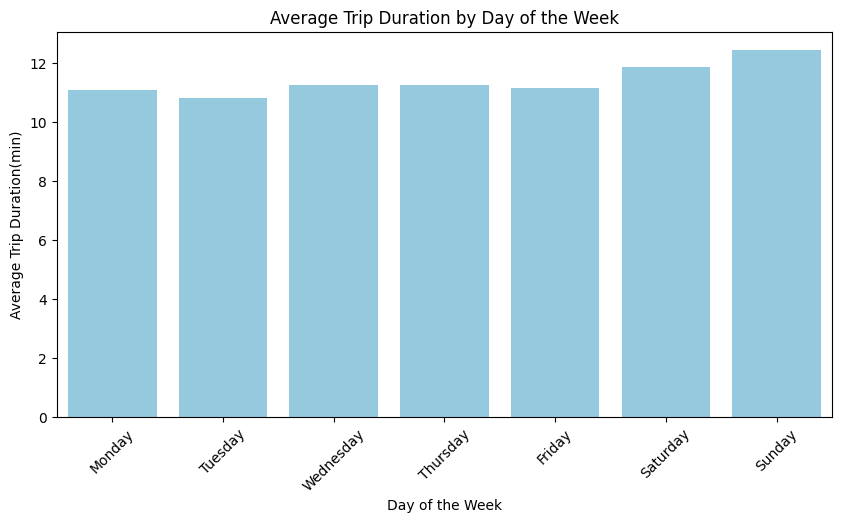

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = df_wd, x = "weekday", y = "trip_duration_min", order =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],color="skyblue")
plt.xlabel("Day of the Week")
plt.ylabel("Average Trip Duration(min)")
plt.title("Average Trip Duration by Day of the Week")
plt.xticks(rotation = 45)
plt.show()

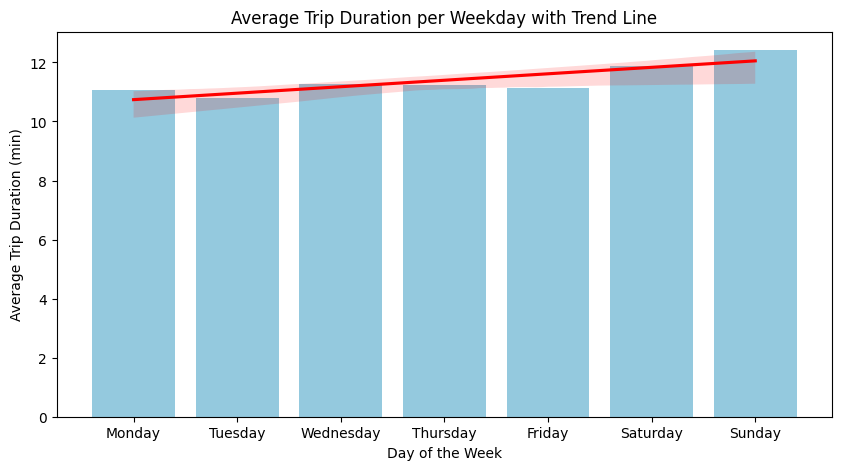

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenação correta dos dias da semana
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,5))

# Gráfico de barras
sns.barplot(data=df_wd, x="weekday", y="trip_duration_min", order=order, color="skyblue")

# Linha de tendência linear
sns.regplot(data=df_wd, x=pd.Categorical(df_wd["weekday"], categories=order, ordered=True).codes, 
            y="trip_duration_min", scatter=False, color="red")

# Ajustando rótulos
plt.xlabel("Day of the Week")
plt.ylabel("Average Trip Duration (min)")
plt.xticks(ticks=range(len(order)), labels=order)  # Garantir que os rótulos aparecem corretamente
plt.title("Average Trip Duration per Weekday with Trend Line")

plt.show()


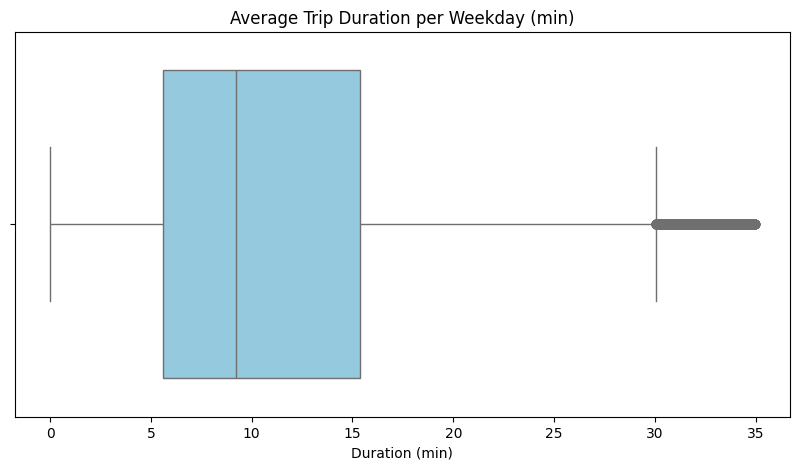

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["trip_duration_min"],color="skyblue")
plt.title("Average Trip Duration per Weekday (min)")
plt.xlabel("Duration (min)")
plt.show()


     mes_nome mes_nome_en
0       April       April
1      August      August
2    December    December
3    February    February
4     January     January
5        July        July
6        June        June
7       March       March
8         May         May
9    November    November
10    October     October
11  September   September


C:\Users\User\AppData\Local\Temp\ipykernel_11732\3572417845.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mes_nome_en", y="count", data=df_mes, order=meses_ordenados_en, palette="Blues")


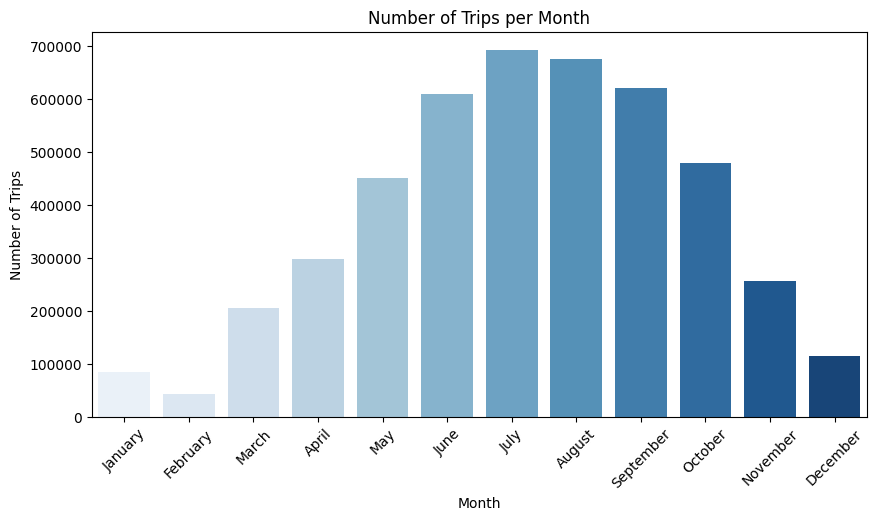

In [46]:
# Criar um dicionário de tradução para os meses
traducao_meses = {
    "Janeiro": "January", "Fevereiro": "February", "Março": "March", "Abril": "April",
    "Maio": "May", "Junho": "June", "Julho": "July", "Agosto": "August",
    "Setembro": "September", "Outubro": "October", "Novembro": "November", "Dezembro": "December"
}
df_mes["mes_nome"] = df_mes["mes_nome"].str.capitalize()

# Traduzir os meses corretamente
df_mes["mes_nome_en"] = df_mes["mes_nome"].replace(traducao_meses)

# Verificar se há valores corretos
print(df_mes[["mes_nome", "mes_nome_en"]].drop_duplicates())

# Criar o gráfico corrigido
meses_ordenados_en = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

plt.figure(figsize=(10, 5))
sns.barplot(x="mes_nome_en", y="count", data=df_mes, order=meses_ordenados_en, palette="Blues")

plt.title("Number of Trips per Month")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_11732\2629265853.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trip_counts, x="Trimester", y="Trip Count", palette="Blues")


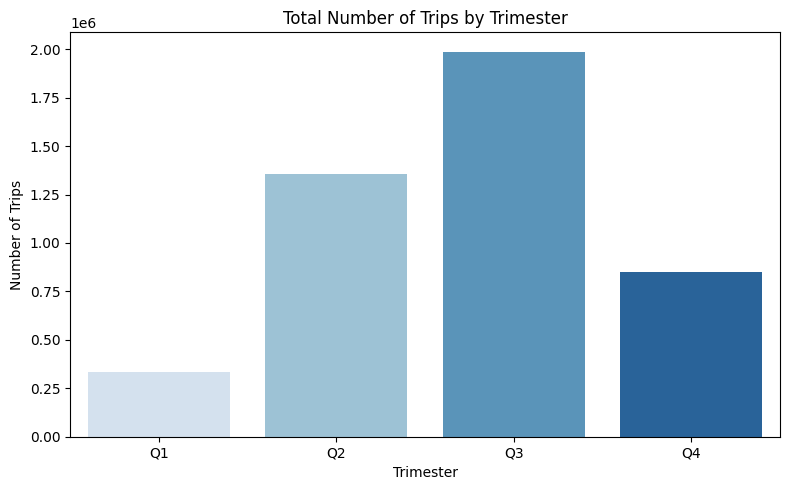

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem de viagens por quadrimestre
trip_counts = df_final["trimester"].value_counts().sort_index().reset_index()
trip_counts.columns = ["Trimester", "Trip Count"]

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=trip_counts, x="Trimester", y="Trip Count", palette="Blues")
plt.title("Total Number of Trips by Trimester")
plt.xlabel("Trimester")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_11732\1395253293.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_duration, x="Trimester", y="Average Duration (min)", palette="Blues")


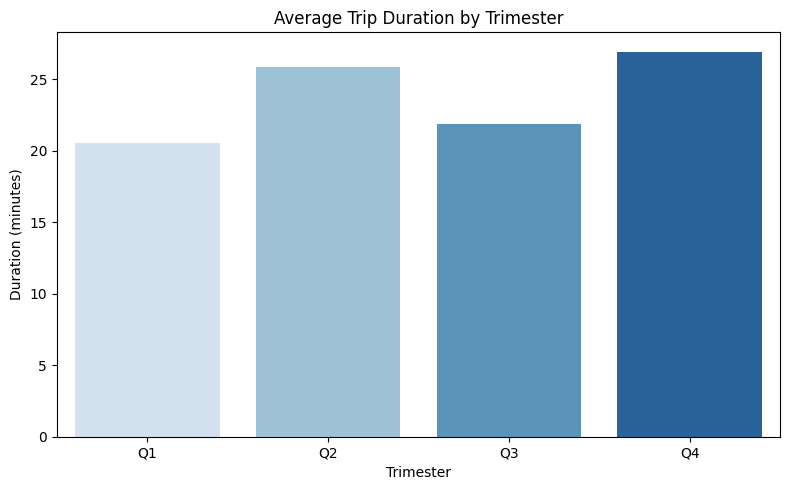

In [48]:
# Média de duração por quadrimestre
avg_duration = df_final.groupby("trimester")["trip_duration_min"].mean().reset_index()
avg_duration.columns = ["Trimester", "Average Duration (min)"]

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_duration, x="Trimester", y="Average Duration (min)", palette="Blues")
plt.title("Average Trip Duration by Trimester")
plt.xlabel("Trimester")
plt.ylabel("Duration (minutes)")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_11732\77429544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="User Type", y="Count", data=df_user_type, palette="Blues")


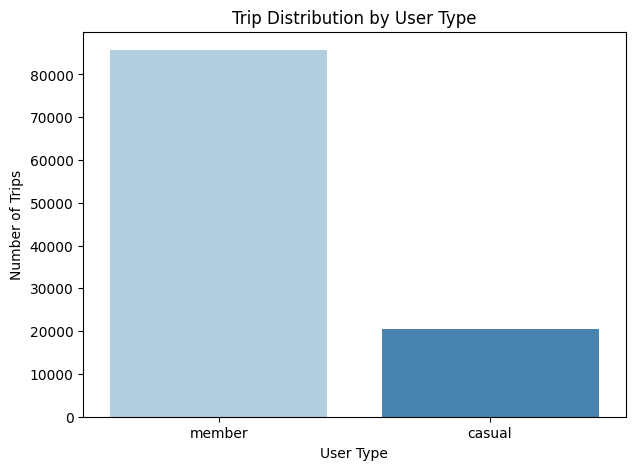

In [49]:
df_user_type = df["member_casual"].value_counts().reset_index()
df_user_type.columns = ["User Type", "Count"]

plt.figure(figsize=(7, 5))
sns.barplot(x="User Type", y="Count", data=df_user_type, palette="Blues")
plt.title("Trip Distribution by User Type")
plt.ylabel("Number of Trips")
plt.show()


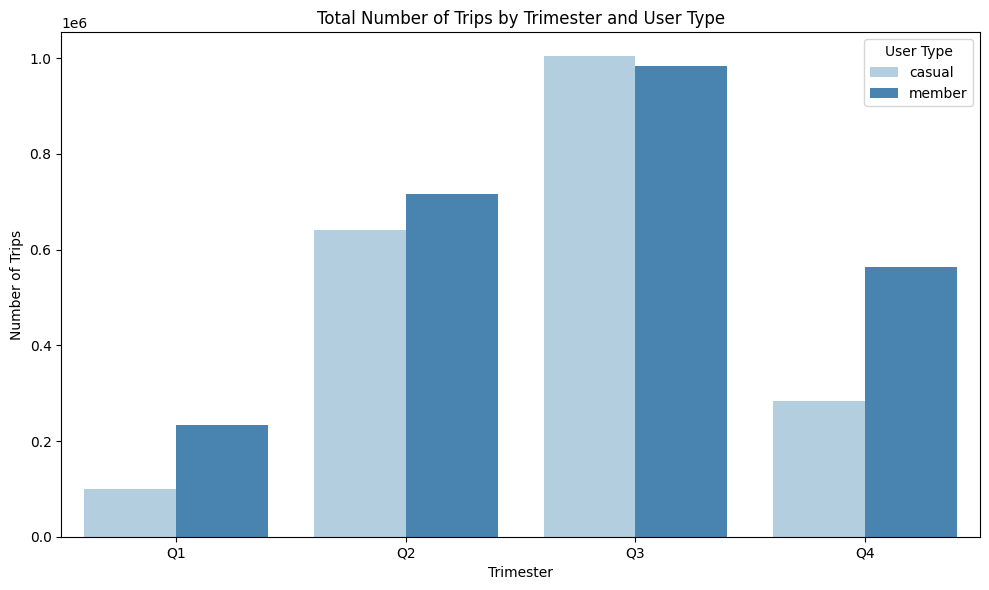

In [50]:
# Agrupamento por tipo de membro e quadrimestre
user_trimester_counts = df_final.groupby(["trimester", "member_casual"]).size().reset_index(name="Trip Count")

# Gráfico de barras segmentado
plt.figure(figsize=(10, 6))
sns.barplot(data=user_trimester_counts, x="trimester", y="Trip Count", hue="member_casual", palette="Blues")
plt.title("Total Number of Trips by Trimester and User Type")
plt.xlabel("Trimester")
plt.ylabel("Number of Trips")
plt.legend(title="User Type")
plt.tight_layout()
plt.show()


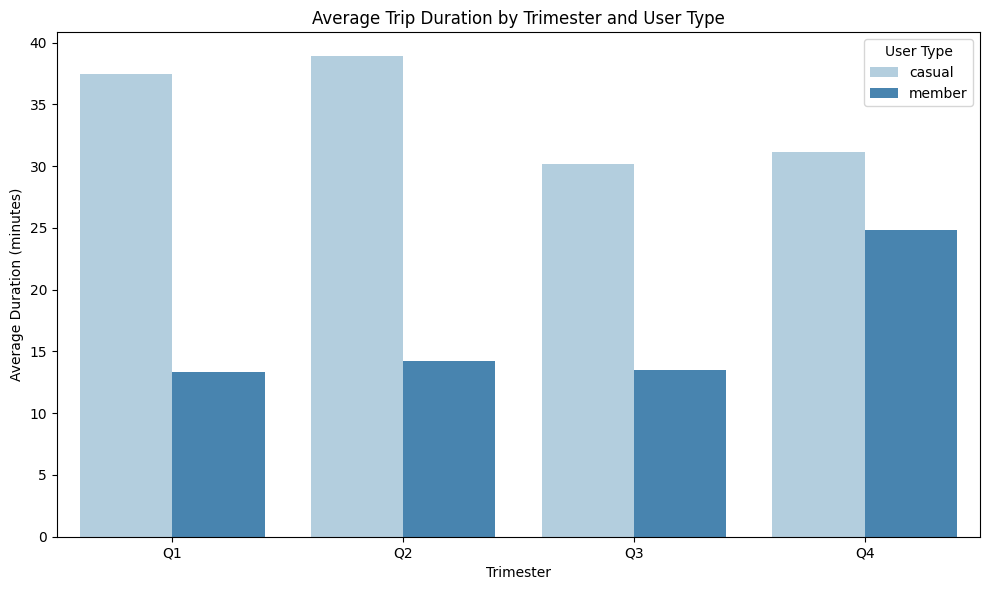

In [51]:
# Agrupamento por tipo de membro e quadrimestre
user_avg_duration = df_final.groupby(["trimester", "member_casual"])["trip_duration_min"].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=user_avg_duration, x="trimester", y="trip_duration_min", hue="member_casual", palette="Blues")
plt.title("Average Trip Duration by Trimester and User Type")
plt.xlabel("Trimester")
plt.ylabel("Average Duration (minutes)")
plt.legend(title="User Type")
plt.tight_layout()
plt.show()


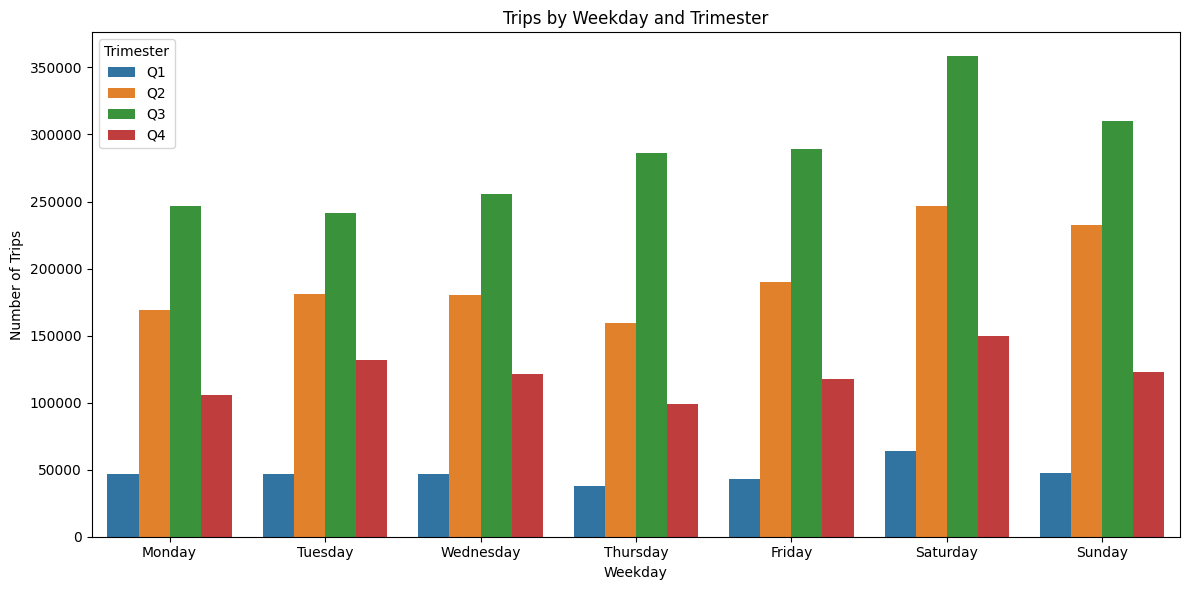

In [54]:
# Ordenar dias da semana manualmente
dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Agrupamento
weekday_trimester = df_final.groupby(["trimester", "weekday"]).size().reset_index(name="Trip Count")

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_trimester, x="weekday", y="Trip Count", hue="trimester", order=dias_ordenados)
plt.title("Trips by Weekday and Trimester")
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.legend(title="Trimester")
plt.tight_layout()
plt.show()


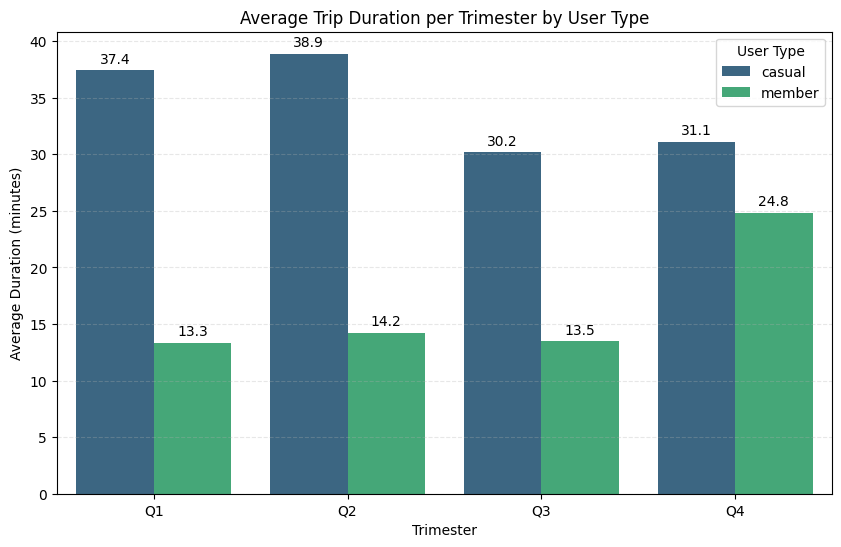

In [61]:
# Agrupando por trimestre e tipo de usuário
avg_duration_by_trimester = df_final.groupby(["trimester", "member_casual"])["trip_duration_min"].mean().reset_index()

# Ordem correta dos trimestres
order = ["Q1", "Q2", "Q3", "Q4"]

# Gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=avg_duration_by_trimester,
    x="trimester",
    y="trip_duration_min",
    hue="member_casual",
    palette="viridis",
    order=order
)

# Rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=3)

plt.title("Average Trip Duration per Trimester by User Type")
plt.ylabel("Average Duration (minutes)")
plt.xlabel("Trimester")
plt.legend(title="User Type")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()




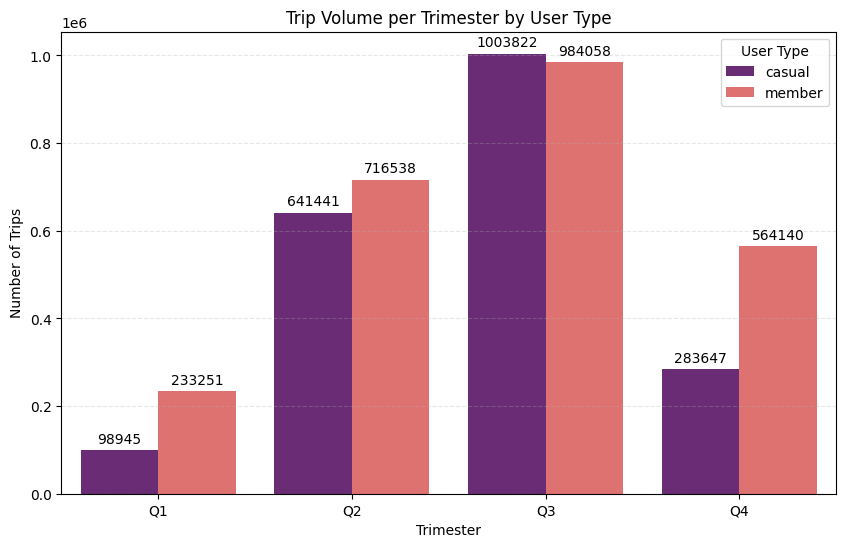

In [62]:
# Contagem de viagens por trimestre e tipo de usuário
count_by_trimester = df_final.groupby(["trimester", "member_casual"]).size().reset_index(name="count")

# Ordem dos trimestres
order = ["Q1", "Q2", "Q3", "Q4"]

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=count_by_trimester,
    x="trimester",
    y="count",
    hue="member_casual",
    palette="magma",
    order=order
)

# Rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)

plt.title("Trip Volume per Trimester by User Type")
plt.ylabel("Number of Trips")
plt.xlabel("Trimester")
plt.legend(title="User Type")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()


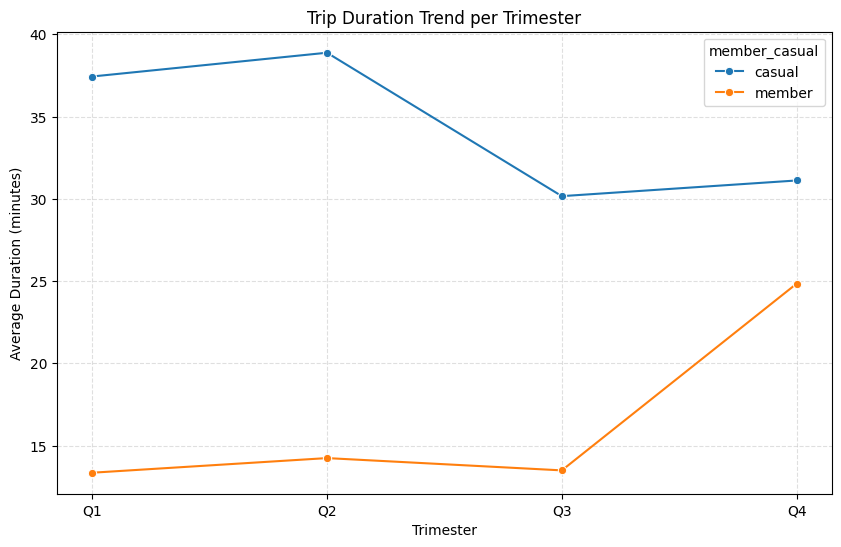

In [63]:
# Gráfico de linhas de média por trimestre
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=avg_duration_by_trimester,
    x="trimester",
    y="trip_duration_min",
    hue="member_casual",
    marker="o",
    palette="tab10"
)

plt.title("Trip Duration Trend per Trimester")
plt.ylabel("Average Duration (minutes)")
plt.xlabel("Trimester")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


# 📊 Analysis Log

## 🧠 Objective

The main goal of this analysis was to understand how **casual riders** and **annual members** use the Cyclistic bike-share service differently. This supports the business question of how to **convert casual riders into annual members**.

---

## 🗂️ Exploratory Data Analysis (EDA)

### 📅 Temporal Trends

- **High usage seasons** correspond to **Q2 and Q3**, which are aligned with **Chicago’s peak tourism months** (spring and summer).
- **Low usage occurs in Q1**, which overlaps with winter, likely due to weather conditions.
- **Saturdays** are the most popular day for rides overall.
- **Sundays** tend to have **longer average trip durations**, suggesting leisure-oriented behavior.

### 👥 User Behavior

- **Casual users dominate during the high-tourism season**, especially in Q2 and Q3.
- **Annual members are more consistent** throughout the year and tend to use the service more frequently during weekdays.
- **Casual users take longer trips on average**, particularly on weekends, indicating the use of bikes for leisure or exploration.
- **Annual members take shorter, more frequent rides**, likely for commuting or quick errands.

---

## 🔍 Key Insights

- There is a **strong seasonal trend** in usage, especially among casual riders.
- **Weekends, especially Saturdays, see peak activity**, suggesting a promotional opportunity.
- Casual riders behave like **tourists or occasional users**, while members show patterns of **habitual and utilitarian use**.
- **Conversion opportunities** may be highest during the **spring and summer**, when casual usage peaks.

---

## 💡 Business Hypothesis

> Casual riders are likely **tourists or infrequent users** who rent bikes for leisure during warmer seasons and weekends.  
> Annual members are **local, routine users** who commute or perform daily tasks using the service.

---

## ✅ Questions Answered

1. **How do annual members and casual riders use Cyclistic bikes differently?**  
   > Members ride year-round with shorter, more frequent trips. Casual riders peak in summer and ride longer distances, often on weekends.

2. **Why would casual riders buy Cyclistic annual memberships?**  
   > If marketed with benefits like **discounted long-term pricing**, **seasonal promotions**, or **flexible commute options**, casual users may convert during their peak activity windows (e.g., spring and summer).

3. **How can Cyclistic use digital media to influence casual riders to become members?**  
   > Through **targeted campaigns during Q2–Q3**, focusing on:
   - Cost savings for frequent rides
   - Perks for members (priority access, flexible rentals)
   - Testimonials and ads placed in tourist hotspots or travel platforms


